In [9]:
# Step 1: Upload Dataset
from google.colab import files
uploaded = files.upload()  # Upload mall_customers.csv

Saving Mall_Customers.csv to Mall_Customers.csv


In [10]:
# Step 2: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [12]:
# Step 3: Load Data
df = pd.read_csv("Mall_Customers.csv")
print("First five rows:\n", df.head())

First five rows:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [13]:
# Step 4: Select Features (Annual Income vs Spending Score)
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

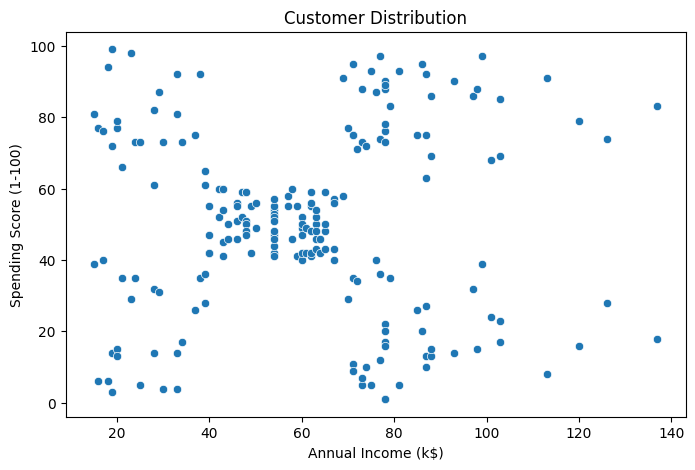

In [14]:
# Step 5: Visualize Raw Data
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)
plt.title("Customer Distribution")
plt.show()

In [15]:
# Step 6: Calculate WSS (Within-Cluster Sum of Squares) for K = 1 to 10
wss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

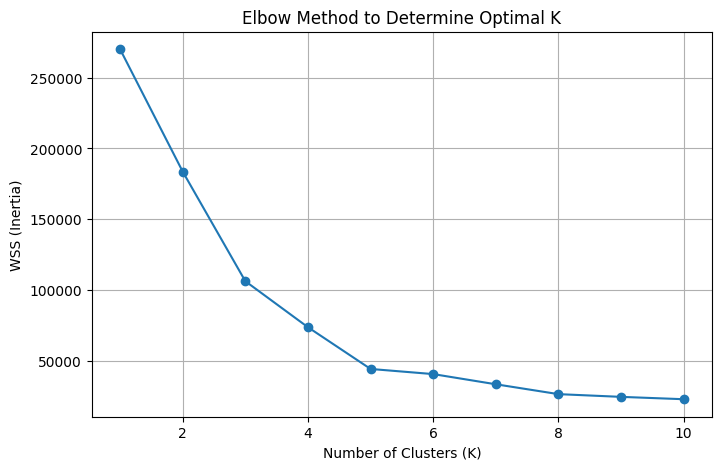

In [16]:
# Step 7: Plot Elbow Curve to Find Best K
plt.figure(figsize=(8, 5))
plt.plot(K_range, wss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WSS (Inertia)")
plt.title("Elbow Method to Determine Optimal K")
plt.grid(True)
plt.show()

In [17]:
# Step 8: Use Optimal K from Elbow Plot (e.g., K=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)


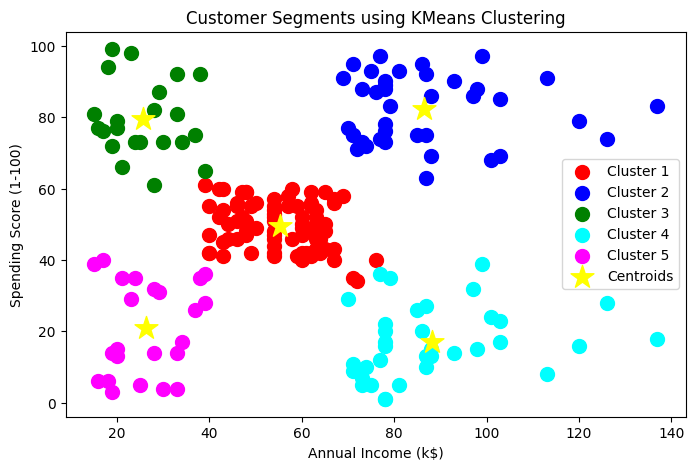

In [18]:
# Step 9: Visualize Clusters with Centroids
plt.figure(figsize=(8, 5))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(optimal_k):
    plt.scatter(X.values[y_kmeans == i, 0], X.values[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='*')
plt.title("Customer Segments using KMeans Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()
